# pack them together - 1D

NameError: name 'data' is not defined

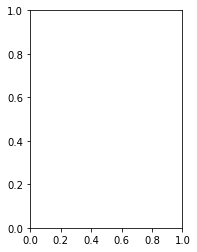

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

%matplotlib inline

def load_data():
    
    data=np.load('/Users/chiaentsai/Desktop/lab/gaussian/bigaussian.npy')
    ynum,xnum=data.shape
    xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))
    
def show_image():
    
    fig=plt.figure()
    fig1=fig.add_subplot(121)
    plt.imshow(data)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    
    fig2=fig.add_subplot(122, projection='3d')
    fig2=plt.gca(projection='3d')
    fig2.plot_surface(xaxis,yaxis,data)
    fig2.set_xlabel('x axis')
    fig2.set_ylabel('y axis')
    fig2.set_zlabel('z axis')
    

def show_1d_image():    
    
    fig=plt.figure()
    fig3=fig.add_subplot(121)
    y_data=np.max(data,1)
    x_data=np.max(data,0)
    plt.plot(x_data)
    plt.title('x_axis vs intensity')
    plt.xlabel('x axis')
    plt.ylabel('intensity')
    
    
    fig4=fig.add_subplot(122)
    plt.plot(y_data)
    plt.title('y_axis vs intensity')
    plt.xlabel('y axis')
    

    
def gauss(x, a, b, c):
    return a*np.exp(-(x-b)**2/c**2)

def fit_1d_gaussian():
    
    x1daxis=range(xnum)
    y1daxis=range(ynum)

    xabc, xpara = curve_fit(gauss,x1daxis,x_data)
    yabc, ypara = curve_fit(gauss,y1daxis,y_data)

    xfitValue = gauss(x1daxis,xabc[0],xabc[1],xabc[2])
    yfitValue = gauss(y1daxis,yabc[0],yabc[1],yabc[2])
    
    fig=plt.figure()
    fig5=fig.add_subplot(121)
    plt.plot(x1daxis,x_data)
    plt.plot(x1daxis,xfitValue,color="orange")
    plt.xlabel('x axis')
    plt.ylabel('intensity')
    plt.legend(['raw data','fit curve'],loc=4
          )
    print('equation on x axis : '+f'{xabc[0]}*exp(-(x-{xabc[1]})**2/{xabc[2]}**2)')
    print('peak :',xabc[0])

    fig6=fig.add_subplot(122)
    plt.plot(y1daxis,y_data)
    plt.plot(y1daxis,yfitValue,color="orange")
    plt.xlabel('y axis')
    plt.legend(['raw data','fit curve'],loc=4)
    print('equation on y axis : '+f'{yabc[0]}*exp(-(x-{yabc[1]})**2/{yabc[2]}**2)')
    print('peak :',yabc[0])

def main():
    load_data()
    show_image()
    show_1d_data()
    fit_1d_gaussian()
    
if __name__ == "__main__":
    main()


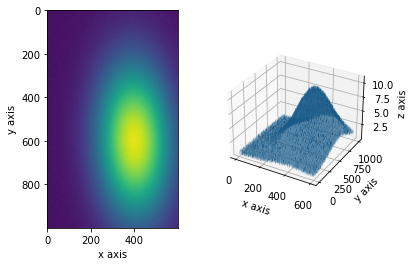

In [14]:
show_image()

# I'm a line

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

%matplotlib inline

In [ ]:
data=np.load('/Users/chiaentsai/Desktop/lab/bigaussian.npy')

ynum,xnum=data.shape
xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))

fig1=plt.imshow(data)

In [ ]:
fig2=plt.gca(projection='3d')
fig2.plot_surface(xaxis,yaxis,data)

# fit 1D Gaussian

In [ ]:
y_data=np.max(data,1)
x_data=np.max(data,0)
plt.subplot(2,2,1)
plt.plot(x_data)
plt.title('x_axis vs intensity')
plt.xlabel('x axis')
plt.ylabel('intensity')

plt.subplot(2,2,2)
plt.plot(y_data)
plt.title('y_axis vs intensity')
plt.xlabel('y axis')


def gauss(x, a, b, c):
    return a*np.exp(-(x-b)**2/c**2)

x1daxis=range(xnum)
y1daxis=range(ynum)

xabc, xpara = curve_fit(gauss,x1daxis,x_data)
yabc, ypara = curve_fit(gauss,y1daxis,y_data)

xfitValue = gauss(x1daxis,xabc[0],xabc[1],xabc[2])
yfitValue = gauss(y1daxis,yabc[0],yabc[1],yabc[2])

plt.subplot(2,2,3)
plt.plot(x1daxis,x_data)
plt.plot(x1daxis,xfitValue,color="orange")
plt.xlabel('x axis')
plt.ylabel('intensity')
plt.legend(['raw data','fit curve'],loc=4
          )
print('equation on x axis : '+f'{xabc[0]}*exp(-(x-{xabc[1]})**2/{xabc[2]}**2)')
print('peak :',xabc[0])

plt.subplot(2,2,4)
plt.plot(y1daxis,y_data)
plt.plot(y1daxis,yfitValue,color="orange")
plt.xlabel('y axis')
plt.legend(['raw data','fit curve'],loc=4)
print('equation on y axis : '+f'{yabc[0]}*exp(-(x-{yabc[1]})**2/{yabc[2]}**2)')
print('peak :',yabc[0])

# pack them together - 2D

NameError: name 'xaxis' is not defined

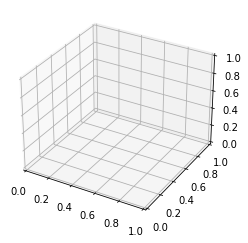

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
%matplotlib inline

def load_data():
    data=np.load('/Users/chiaentsai/Desktop/lab/gaussian/bigaussian.npy')
    
def gauss2d(data_tuple, amp, x0, y0, a, b, c):
    
    (x,y) = data_tuple    
    inner = a * (x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2
    inner = -inner
    g = amp*np.exp(inner)
    return g

def fit_2d_gaussian():
    
    ynum,xnum=data.shape
    xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))
    
    y_maxs=np.max(data,1)
    x_maxs=np.max(data,0)
    max_index_y=np.argmax(y_maxs)
    max_index_x=np.argmax(x_maxs)
    
    xdata = np.vstack((xaxis.ravel(),yaxis.ravel()))
    ydata = data.ravel()

    pred_params, uncert_cov = curve_fit(gauss2d,xdata,ydata,p0=[x_maxs.max(),max_index_x,max_index_y,0,0,0],
                                        maxfev=20000)

    fitvalue=gauss2d((xaxis,yaxis), pred_params[0], pred_params[1], pred_params[2], pred_params[3], 
                 pred_params[4], pred_params[5])

def show_fit_result():
    fig3=plt.gca(projection='3d')
    fig3.plot_surface(xaxis,yaxis,fitvalue,color="yellow")
    print('equation : '+f'{pred_params[0]}*exp(-(x-{pred_params[1]})**2/(2*{pred_params[3]}**2)-((y-{pred_params[2]})**2)/(2*({pred_params[4]})**2)','\n')
    print('peak :',pred_params[0])
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title('fit curve')


def show_raw_data():
    fig2=plt.gca(projection='3d')
    fig2.plot_surface(xaxis,yaxis,data)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.title('raw data')
    
def main():
    load_data()
    show_raw_data()
    fit_2d_gaussian()
    show_fit_result()
    
    
if __name__ == "__main__":
    main()

NameError: name 'xaxis' is not defined

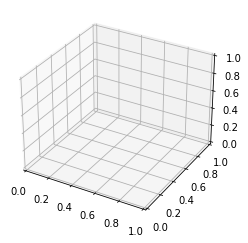

In [9]:
show_fit_result()

# fit 2D Gaussian

In [10]:
y_maxs=np.max(data,1)
x_maxs=np.max(data,0)
max_index_y=np.argmax(y_maxs)
max_index_x=np.argmax(x_maxs)

NameError: name 'data' is not defined

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
%matplotlib inline


data=np.load('/Users/chiaentsai/Desktop/lab/gaussian/bigaussian.npy')
ynum,xnum=data.shape
xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))


def gauss2d(data_tuple, amp, x0, y0, a, b, c):
    
    (x,y) = data_tuple    
    inner = a * (x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2
    inner = -inner
    g = amp*np.exp(inner)
    return g

y_maxs=np.max(data,1)
x_maxs=np.max(data,0)
max_index_y=np.argmax(y_maxs)
max_index_x=np.argmax(x_maxs)


xdata = np.vstack((xaxis.ravel(),yaxis.ravel()))
ydata = data.ravel()

pred_params, uncert_cov = curve_fit(gauss2d,xdata,ydata,p0=[x_maxs.max(),max_index_x,max_index_y,0,0,0],maxfev=20000)

fitvalue=gauss2d((xaxis,yaxis), pred_params[0], pred_params[1], pred_params[2], pred_params[3], 
                 pred_params[4], pred_params[5])


Text(0.5, 0.92, 'raw data')

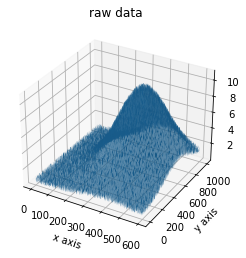

In [12]:
fig2=plt.gca(projection='3d')
fig2.plot_surface(xaxis,yaxis,data)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('raw data')

equation : 10.199697360926551*exp(-(x-399.0553970502764)**2/(2*2.9601030956977917e-05**2)-((y-598.6342034506614)**2)/(2*(-7.529057283885028e-07)**2) 

peak : 10.199697360926551


Text(0.5, 0.92, 'fit curve')

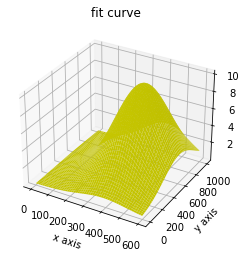

In [13]:
fig3=plt.gca(projection='3d')
fig3.plot_surface(xaxis,yaxis,fitvalue,color="yellow")
print('equation : '+f'{pred_params[0]}*exp(-(x-{pred_params[1]})**2/(2*{pred_params[3]}**2)-((y-{pred_params[2]})**2)/(2*({pred_params[4]})**2)','\n')
print('peak :',pred_params[0])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('fit curve')